# Movie Genre Classification

Dataset: -
https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score, recall_score, f1_score

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# use a Kaggle dataset in your Google Colab notebook
# need to install the Kaggle API
# !pip install kaggle

In [5]:
# to upload the kaggle.json file:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akashilay","key":"4b492ff0abe2f5cacdffcb47c8bf1def"}'}

In [6]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 98% 41.0M/41.7M [00:00<00:00, 61.0MB/s]
100% 41.7M/41.7M [00:00<00:00, 56.7MB/s]


In [7]:
# Unzip the downloaded dataset.
!unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [8]:
train_data = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', sep=":::", names=["Title", "Genre", "Description"])

<ipython-input-8-c8f5caf058dc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', sep=":::", names=["Title", "Genre", "Description"])


In [9]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
train_data.shape

(54214, 3)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [13]:
train_data.duplicated().sum()

0

In [14]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [15]:
test_data = pd.read_csv("/content/Genre Classification Dataset/test_data.txt", sep=":::", names=["Id" ,"Title", "Description"])

<ipython-input-15-ef5ef4298840>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/Genre Classification Dataset/test_data.txt", sep=":::", names=["Id" ,"Title", "Description"])


In [16]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [17]:
test_data.shape

(54200, 3)

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


##Analysis

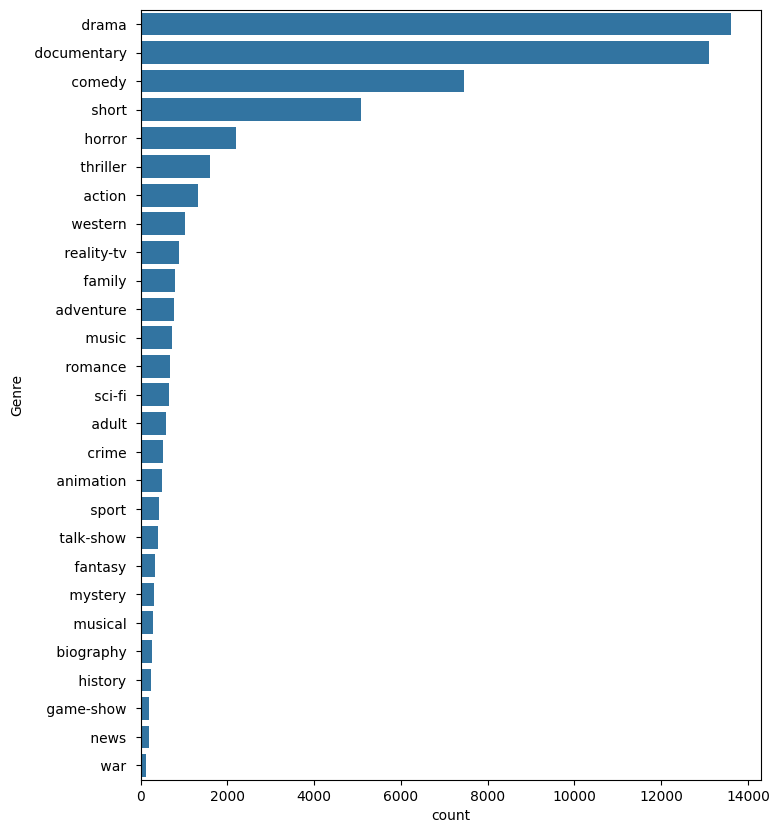

In [19]:
plt.figure(figsize=(8,10))
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index)
plt.show()

In [20]:
train_data['Genre']

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

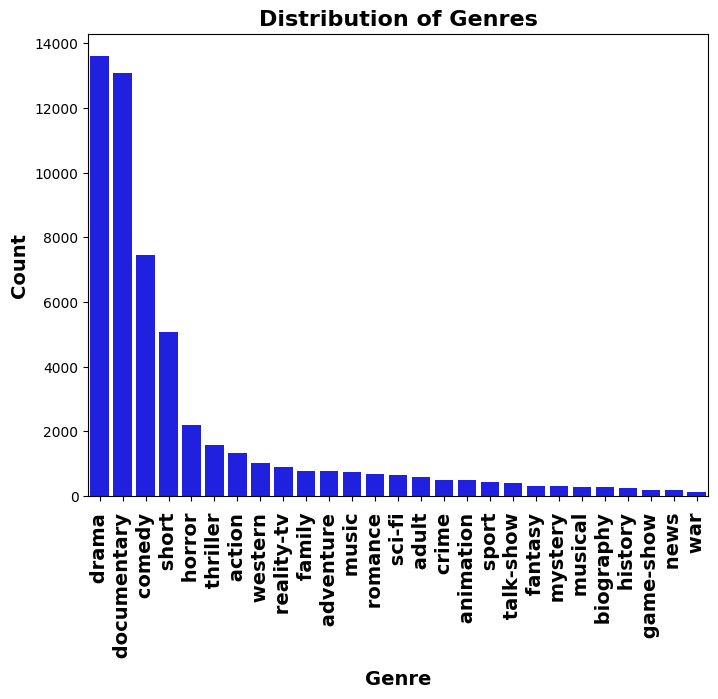

In [21]:
plt.figure(figsize=(8,6))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold');

In [22]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


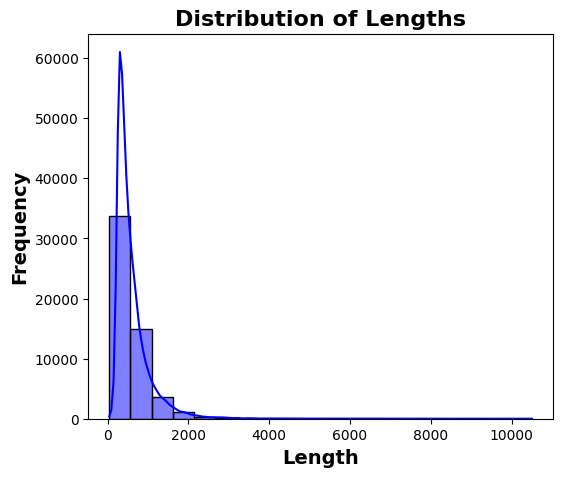

In [23]:
plt.figure(figsize=(6, 5))
sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

##Data Preprocessing

In [24]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["Description"].apply(data_processing)
test_data["TextCleaning"] = test_data["Description"].apply(data_processing)


In [25]:
train_data

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


## Using TF-IDF to vectorize the data

In [26]:
vector = TfidfVectorizer()

x_train = vector.fit_transform(train_data["TextCleaning"])
x_test = vector.transform(test_data["TextCleaning"])

##Split the data into train data and test data

In [27]:
x = x_train
y = train_data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [28]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (43371, 116601)
Size of y_train:  (43371,)
Size of x_test:  (10843, 116601)
Size of y_test:  (10843,)


##Train the model

In [29]:
model = LogisticRegression()

In [30]:
columns=['LogisticRegression','SVC','MultinomialNB']
result=[]

In [31]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
result.append(accuracy)

print("-----Model Evaluation on Test Data-----")
print(model)
print(accuracy)

-----Model Evaluation on Test Data-----
LogisticRegression()
0.5774232223554366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
